In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

### First Step: Import Necessary Libraries
Before we do any work with the dataset, we need to import the essential Python libraries for data manipulation and visualization. These are:

- **pandas** for data handling
- **matplotlib** and **seaborn** for data visualization

Here’s the code to start with:

```python
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
```

This will ensure that we have the basic tools we need.

In [3]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Step 2: Load the Iris Dataset

Now that the libraries are ready, we need to load the Iris dataset into a pandas DataFrame. The dataset is included in the `seaborn` library, so we can easily load it like this:

```python
# Load the Iris dataset
df = sns.load_dataset('iris')

# Display the first few rows to see the data
df.head()
```

This will give you a preview of the dataset. The Iris dataset consists of 150 samples with the following columns:
- **sepal_length**: The length of the sepal (cm)
- **sepal_width**: The width of the sepal (cm)
- **petal_length**: The length of the petal (cm)
- **petal_width**: The width of the petal (cm)
- **species**: The species of the Iris flower (setosa, versicolor, or virginica)


In [4]:
# Load the Iris dataset
df = sns.load_dataset('iris')

# Display the first few rows to see the data
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### Step 3: Understand the Structure of the Dataset

Before diving into visualizations, it's important to understand the structure of the dataset. We should look at some key information such as the number of entries, data types, and missing values (if any).

Run the following code to get a summary:

```python
# Get an overview of the dataset
df.info()

# Get basic statistics of the numerical columns
df.describe()
```

This will help you understand the number of rows, columns, data types, and whether there are any missing values. The `.describe()` method provides useful statistics like mean, min, max, and percentiles for the numeric columns.

In [5]:
# Get an overview of the dataset
df.info()

# Get basic statistics of the numerical columns
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### Step 4 (with matplotlib): Plot Sepal Length vs. Sepal Width

```python
# Define colors for each species
colors = {'setosa': 'red', 'versicolor': 'blue', 'virginica': 'green'}

# Create a scatter plot for Sepal Length vs Sepal Width
for species in df['species'].unique():
    subset = df[df['species'] == species]
    plt.scatter(subset['sepal_length'], subset['sepal_width'], 
                color=colors[species], label=species, alpha=0.7)

# Add labels and title
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Sepal Length vs Sepal Width by Species')
plt.legend()

# Show the plot
plt.show()
```

This plot shows the relationship between **sepal length** and **sepal width**, colored by species. We’ll build similar plots for other pairs in the next steps, but let’s start with this one.

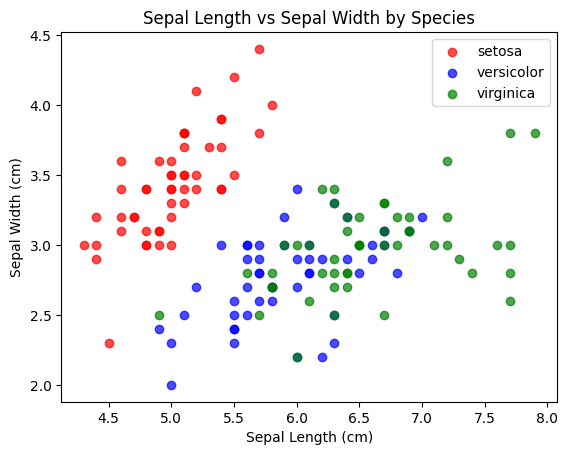

In [7]:
# Define colors for each species
colors = {'setosa': 'red', 'versicolor': 'blue', 'virginica': 'green'}

# Create a scatter plot for Sepal Length vs Sepal Width
for species in df['species'].unique():
    subset = df[df['species'] == species]
    plt.scatter(subset['sepal_length'], subset['sepal_width'], 
                color=colors[species], label=species, alpha=0.7)

# Add labels and title
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Sepal Length vs Sepal Width by Species')
plt.legend()

# Show the plot
plt.show()

### Step 4 (With sns): Visualizing the Data Distribution with Pairplot

Now that we understand the structure of the dataset, let’s create a **pairplot** to visualize the relationships between all pairs of features (sepal length, sepal width, petal length, petal width). This will help us see how the features vary between different species.

Here's the code for the pairplot:

```python
# Create a pairplot to visualize the relationships between variables
sns.pairplot(df, hue='species', markers=["o", "s", "D"])
plt.show()
```

- **`hue='species'`** colors the points based on the species of the flower.
- **`markers`** assigns different shapes to each species for better visual distinction.

This plot will give you a grid of scatterplots, making it easy to see how features like petal length and width differ across species.

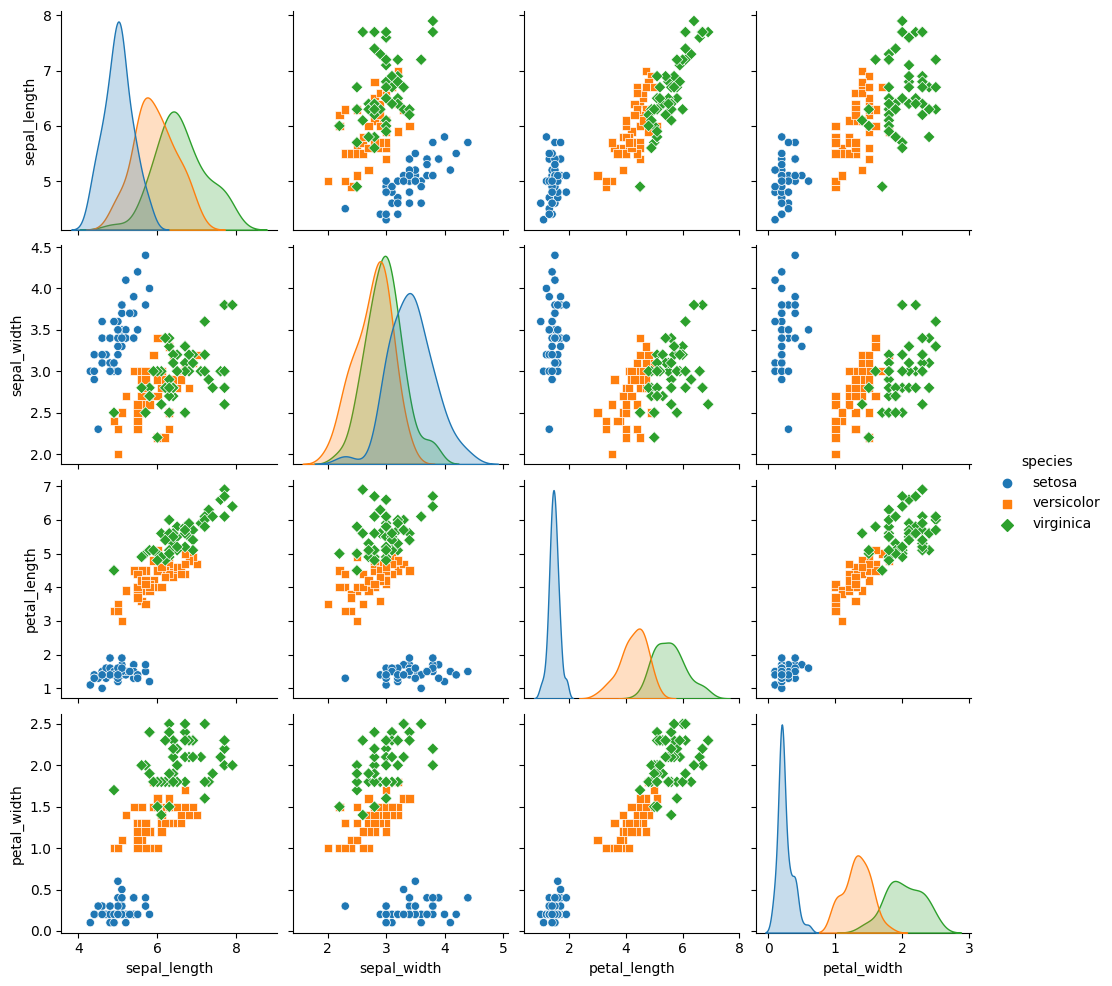

In [9]:
# Suppress warnings temporarily
import warnings
warnings.filterwarnings('ignore')

# Create the pairplot
sns.pairplot(df, hue='species', markers=["o", "s", "D"])
plt.show()

in the 16 charts above we can see some clear things. Some of the charts do not help us classify diferent types. those are
- sepal_length vs sepal_width
- sepal_width vs sepal_length

so we definitely shouold not take those for classification


### Step 5: Scatter Plot for Petal Length vs Petal Width with Seaborn

```python
# Create a scatter plot for Petal Length vs Petal Width using seaborn
sns.scatterplot(x='petal_length', y='petal_width', hue='species', data=df, palette='Set1', s=100)

# Add labels and title
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('Petal Length vs Petal Width by Species')

# Show the plot
plt.show()
```

This plot will clearly show the separation between the three species based on their petal dimensions.

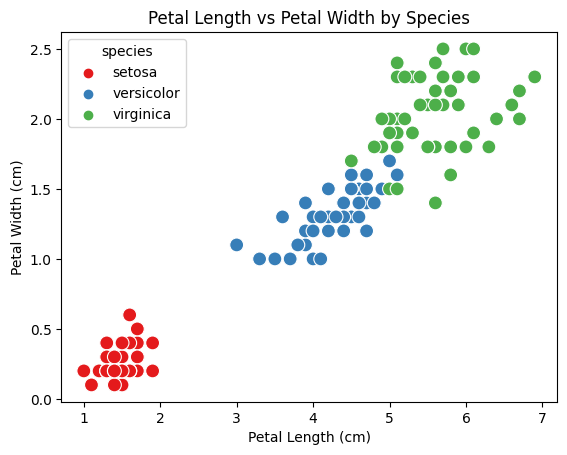

In [10]:
# Create a scatter plot for Petal Length vs Petal Width using seaborn
sns.scatterplot(x='petal_length', y='petal_width', hue='species', data=df, palette='Set1', s=100)

# Add labels and title
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('Petal Length vs Petal Width by Species')

# Show the plot
plt.show()

### Step 6: Visualizing the Distribution of Each Feature

To better understand the distribution of each feature (sepal length, sepal width, petal length, petal width), we can use **histograms** or **boxplots**. These plots help us see the spread and any potential outliers.

Let’s start with **boxplots** to visualize the distribution of sepal length for each species.

#### Boxplot for Sepal Length by Species:

```python
# Create a boxplot for Sepal Length by Species
sns.boxplot(x='species', y='sepal_length', data=df, palette='Set2')

# Add title and labels
plt.title('Distribution of Sepal Length by Species')
plt.xlabel('Species')
plt.ylabel('Sepal Length (cm)')

# Show the plot
plt.show()
```

This will give you an overview of how sepal length varies across different species and highlight any outliers.

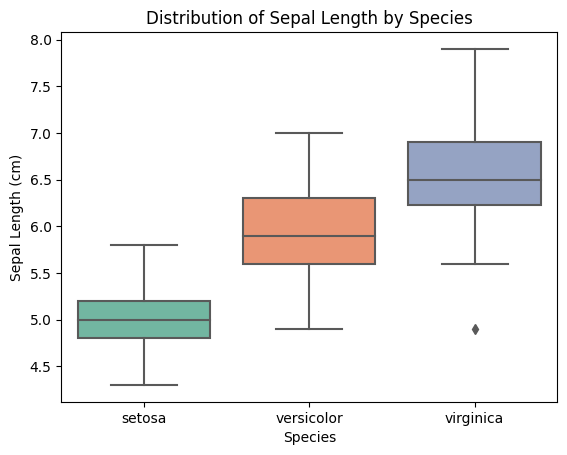

In [11]:
# Create a boxplot for Sepal Length by Species
sns.boxplot(x='species', y='sepal_length', data=df, palette='Set2')

# Add title and labels
plt.title('Distribution of Sepal Length by Species')
plt.xlabel('Species')
plt.ylabel('Sepal Length (cm)')

# Show the plot
plt.show()

### Step 7: Boxplot for Sepal Width by Species

Next, let's create a **boxplot** to visualize the distribution of **sepal width** across different species. This will allow us to compare the spread and potential outliers of sepal width for each species.

Here’s the code:

```python
# Create a boxplot for Sepal Width by Species
sns.boxplot(x='species', y='sepal_width', data=df, palette='Set2')

# Add title and labels
plt.title('Distribution of Sepal Width by Species')
plt.xlabel('Species')
plt.ylabel('Sepal Width (cm)')

# Show the plot
plt.show()
```

This boxplot will give you insights into how sepal width differs among the species.

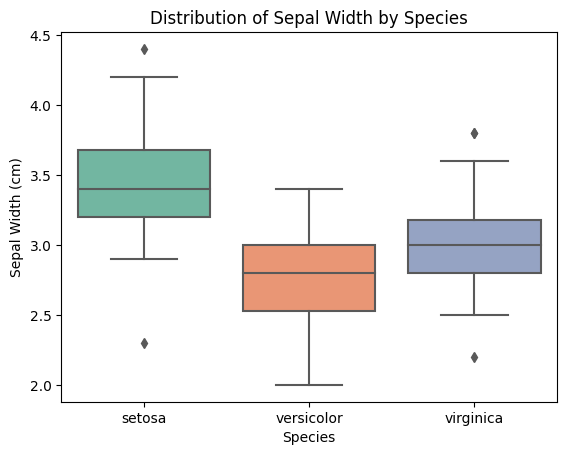

In [12]:
# Create a boxplot for Sepal Width by Species
sns.boxplot(x='species', y='sepal_width', data=df, palette='Set2')

# Add title and labels
plt.title('Distribution of Sepal Width by Species')
plt.xlabel('Species')
plt.ylabel('Sepal Width (cm)')

# Show the plot
plt.show()

### Step 8: Boxplot for Petal Length by Species

Let’s now visualize the distribution of **petal length** across different species using a boxplot. This will show how petal length varies among species and highlight any differences.

Here’s the code:

```python
# Create a boxplot for Petal Length by Species
sns.boxplot(x='species', y='petal_length', data=df, palette='Set2')

# Add title and labels
plt.title('Distribution of Petal Length by Species')
plt.xlabel('Species')
plt.ylabel('Petal Length (cm)')

# Show the plot
plt.show()
```

This plot will help you understand the distribution of petal length for each species.

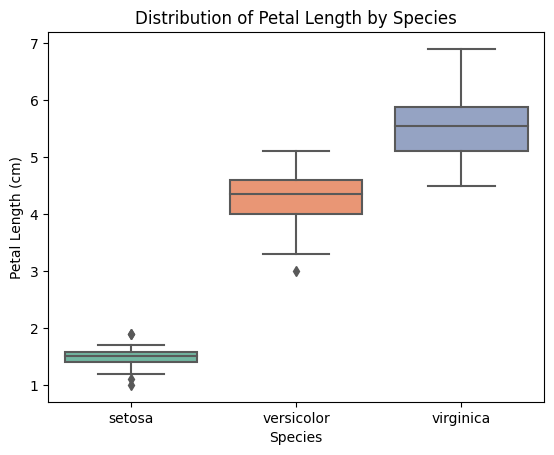

In [13]:
# Create a boxplot for Petal Length by Species
sns.boxplot(x='species', y='petal_length', data=df, palette='Set2')

# Add title and labels
plt.title('Distribution of Petal Length by Species')
plt.xlabel('Species')
plt.ylabel('Petal Length (cm)')

# Show the plot
plt.show()

### Step 9: Boxplot for Petal Width by Species

Now, let's create a boxplot for **petal width** to complete the visualization of all four features. This will show the spread of petal width across the three species.

Here’s the code:

```python
# Create a boxplot for Petal Width by Species
sns.boxplot(x='species', y='petal_width', data=df, palette='Set2')

# Add title and labels
plt.title('Distribution of Petal Width by Species')
plt.xlabel('Species')
plt.ylabel('Petal Width (cm)')

# Show the plot
plt.show()
```

This plot will allow you to compare the petal width distribution for each species.

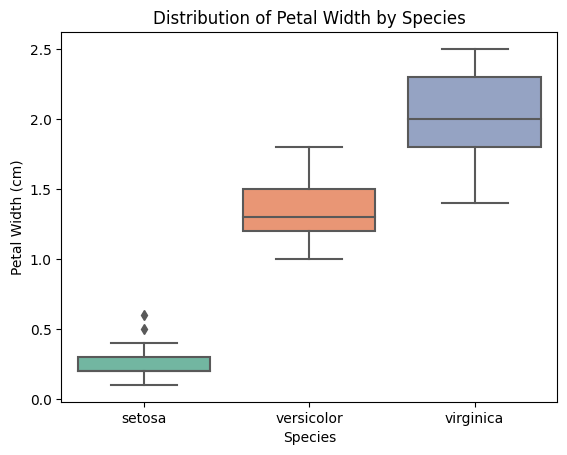

In [14]:
# Create a boxplot for Petal Width by Species
sns.boxplot(x='species', y='petal_width', data=df, palette='Set2')

# Add title and labels
plt.title('Distribution of Petal Width by Species')
plt.xlabel('Species')
plt.ylabel('Petal Width (cm)')

# Show the plot
plt.show()